In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

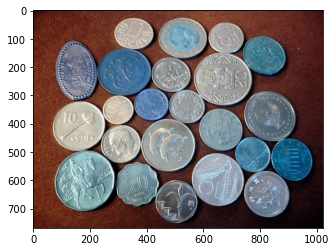

In [3]:
img = cv2.imread(filename="images/coins.jpg")
plt.figure(), plt.imshow(X=img);

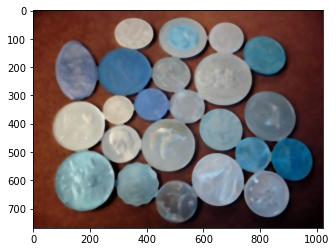

In [11]:
coin_blur = cv2.medianBlur(src=img, ksize=13)
plt.figure(), plt.imshow(X=coin_blur);

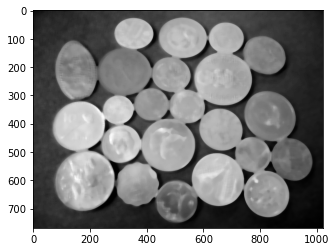

In [12]:
coin_gray = cv2.cvtColor(src=coin_blur, code=cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(X=coin_gray, cmap="gray");

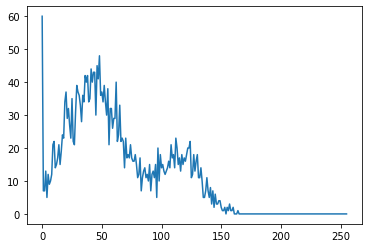

In [43]:
coin_hist = cv2.calcHist(images=img, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.figure(), plt.plot(coin_hist);

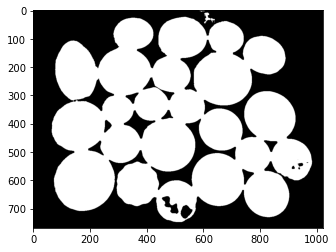

In [47]:
ret, coin_thresh = cv2.threshold(src=coin_gray, thresh=76, maxval=255, type=cv2.THRESH_BINARY)
plt.figure(), plt.imshow(X=coin_thresh, cmap="gray");

In [50]:
contours, hierarchy = cv2.findContours(image=coin_thresh.copy(),
                                       mode=cv2.RETR_CCOMP,
                                       method=cv2.CHAIN_APPROX_SIMPLE)

In [59]:
contours[0]

array([[[640,  40]],

       [[640,  43]]], dtype=int32)

In [54]:
hierarchy[0]

array([[ 1, -1, -1, -1],
       [ 2,  0, -1, -1],
       [23,  1,  3, -1],
       [ 4, -1, -1,  2],
       [ 5,  3, -1,  2],
       [ 6,  4, -1,  2],
       [ 7,  5, -1,  2],
       [ 8,  6, -1,  2],
       [ 9,  7, -1,  2],
       [10,  8, -1,  2],
       [11,  9, -1,  2],
       [12, 10, -1,  2],
       [13, 11, -1,  2],
       [14, 12, -1,  2],
       [15, 13, -1,  2],
       [16, 14, -1,  2],
       [17, 15, -1,  2],
       [18, 16, -1,  2],
       [19, 17, -1,  2],
       [20, 18, -1,  2],
       [21, 19, -1,  2],
       [22, 20, -1,  2],
       [-1, 21, -1,  2],
       [24,  2, -1, -1],
       [25, 23, -1, -1],
       [-1, 24, 26, -1],
       [-1, -1, -1, 25]], dtype=int32)

In [73]:
for element in range(len(contours)):
    if hierarchy[0][element][3] == -1:
        cv2.drawContours(image=img,
                         contours=contours,
                         contourIdx=element,
                         color=(255, 0, 0),
                         thickness=10)

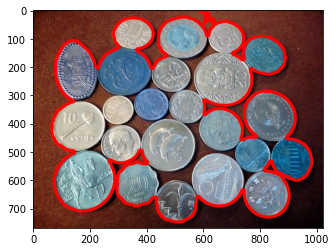

In [74]:
plt.figure(), plt.imshow(X=img);

In [76]:
## watershed

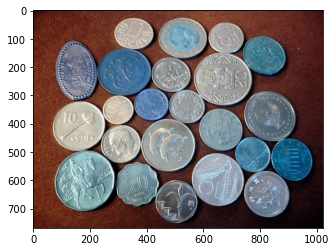

In [75]:
coin = cv2.imread(filename="images/coins.jpg")
plt.figure(), plt.imshow(X=coin);

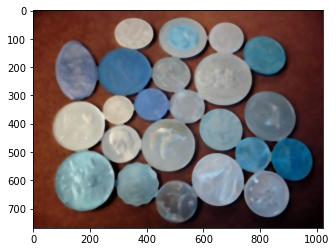

In [78]:
coin_blur = cv2.medianBlur(src=coin, ksize=13)
plt.figure(), plt.imshow(X=coin_blur);

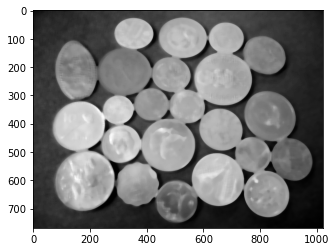

In [81]:
coin_gray = cv2.cvtColor(src=coin_blur, code=cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(X=coin_gray, cmap="gray");

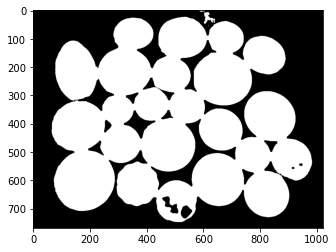

In [85]:
ret, coin_thresh = cv2.threshold(src=coin_gray, thresh=75, maxval=255, type=cv2.THRESH_BINARY)
plt.figure(), plt.imshow(X=coin_thresh, cmap="gray");

### Paralar birbirlerine temas ettikleri için birbirleri ile bağlantılı olarak gözüküyorlar ve bu da her bir parayı bir nesne olarak tespit edebilmemizi imkansız hale getiriyor. Bu yüzden morfolojik operasyonlardan açılma ve daha sonra genişleme işlemlerini yapacağız. Açılma işlemi ile paraların boyutlarını küçültüp tespit edeceğiz, daha sonra da genişleme işlemi ile eski boyutlarına döndüreceğiz.

In [89]:
kernel = np.ones(shape=(3, 3), dtype=np.uint8)

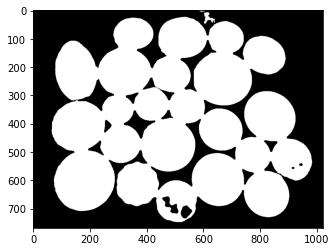

In [94]:
opening = cv2.morphologyEx(src=coin_thresh,
                           op=cv2.MORPH_OPEN,
                           kernel=kernel,
                           iterations=1)
plt.figure(), plt.imshow(X=opening, cmap="gray");

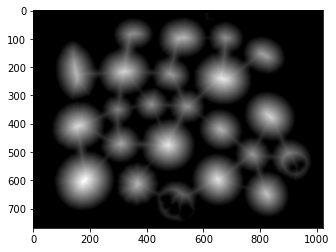

In [97]:
# nesneler arası distance bulalım.
dist_transform = cv2.distanceTransform(src=opening, 
                                       distanceType=cv2.DIST_L2,
                                       maskSize=5)
plt.figure(), plt.imshow(X=dist_transform, cmap="gray");

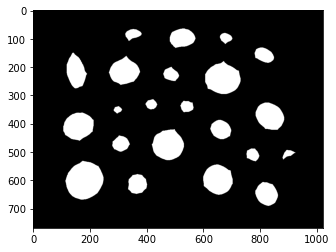

In [105]:
# nesneleri küçültelim.
ret, sure_foreground = cv2.threshold(src=dist_transform,
                                     thresh= 0.4 * np.max(dist_transform),
                                     maxval=255,
                                     type=0)
plt.figure(), plt.imshow(X=sure_foreground, cmap="gray");

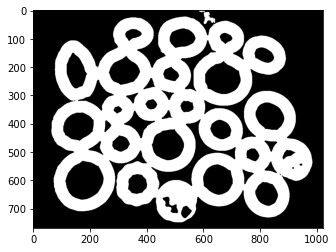

In [117]:
# arka plan için resmi büyültelim.
sure_background = cv2.dilate(src=opening, kernel=kernel, iterations=1)
sure_background = np.uint8(sure_background)
sure_foreground = np.uint8(sure_foreground)
unknown = cv2.subtract(src1=sure_background, src2=sure_foreground)


plt.figure(), plt.imshow(X=unknown, cmap="gray");

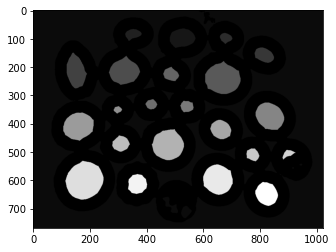

In [119]:
# bağlantı
ret, marker = cv2.connectedComponents(image=sure_foreground)
marker = marker + 1
marker[unknown == 255] = 0
plt.figure(), plt.imshow(X=marker, cmap="gray");

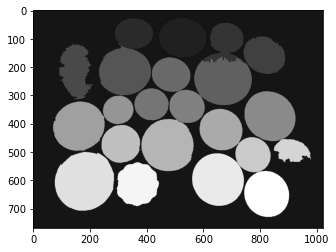

In [122]:
# havza
marker = cv2.watershed(image=coin, markers=marker)
plt.figure(), plt.imshow(X=marker, cmap="gray");

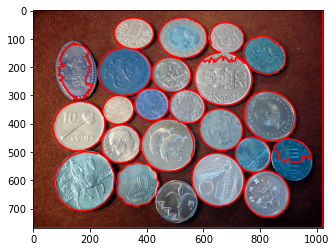

In [126]:
contours, hierarchy = cv2.findContours(image=marker.copy(),
                                       mode=cv2.RETR_CCOMP,
                                       method=cv2.CHAIN_APPROX_SIMPLE)

for element in range(len(contours)):
    if hierarchy[0][element][3] == -1:
        cv2.drawContours(image=coin, 
                         contours=contours, 
                         contourIdx=element,
                         color=(255, 0, 0),
                         thickness=2)
plt.figure(), plt.imshow(X=coin);

## cv2.distanceTransform(src, distanceType, maskSize, dst, distanceType, maskSize)
### Bu fonksiyon, bir görüntünün pikselleri arasındaki uzaklıkları hesaplamak için kullanılan bir fonksiyondur. Bu fonksiyon, genellikle nesne tespiti, görüntü segmentasyonu ve kenar belirleme gibi görüntü işleme problemlerinde kullanılır.
### src: Giriş görüntüsüdür.
### distanceType: Hesaplama yaparken kullanılan mesafe ölçütünü belirler. Örnek olarak, "cv2.DIST_L1" ve "cv2.DIST_L2", "cv2.DIST_C" gibi mesafe türleri kullanılabilir. Varsayılan olarak "cv2.DIST_L2" kullanılır.
### maskSize: Hesaplama için kullanılan maske boyutunu belirler. "cv2.DIST_MASK_3", "cv2.DIST_MASK_5", "cv2.DIST_MASK_PRECISE" gibi maske boyutları kullanılabilir. Varsayılan olarak "cv2.DIST_MASK_5" kullanılır.
### distanceType: Hesaplama sonucunda oluşacak uzaklık görüntüsününn veri tipini belirler. Örneğin, "cv2.CV_32F" gibi bir veri tipi kullanılabilir. Varsayılan olarak "cv2.CV_32F" kullanılır.

## cv2.connectedComponents(image, labels, connectivity, ltype)
### Bu fonksiyon, bir görüntüdeki bağlantılı bileşenleri (connected components) tespit etmek için kullanılan bir fonksiyondur. Bu bileşenler, piksellerin birbirine bağlı olduğu ve aynı nesneyi veya bölgeyi temsil ettiği piksel gruplarıdır. Bu fonksiyon, görüntü analizi, nesne tespiti ve görüntü segmentasyonu gibi birçok uygulamada kullanılabilir.
### image: Giriş görüntüsüdür.
### labels: Bileşenlerin atanacağı etiketlerin tutulacağı görüntüdür.
### connectivity: Piksellerin birbirine bağlı olmasını belirleyen bağlantı parametresidir. Örneğin, 4 veya 8 bağlantıyı belirlemek için "4" veya "8" değerleri kullanılabilir. Varsayılan olarak "8" kullanılır.
### ltype: Oluşacaak etiket görüntüsünün veri tipini belirler. Örneğin, "cv2.CV_32S" gibi bir veri tipi kullanılabilir.

## cv2.watershed(image, markers)
### Bu fonksiyon, Watershed algoritmasını kullanarak görüntü segmentasyonu yapmak için kullanılan bir fonksiyondur. Bu algoritma, görüntüdeki farklı bölgeleri birbirinden ayırmak için kullanılır.
### image: Giriş görüntüsüdür.
### markers: Watershed algoritmasının kullanacağı başlangıç işaretlemelerini içeren görüntüdür. Bu parametre, "cv2.connectedComponents()" fonksiyonu gibi bir yöntemle oluşturulabilir.

### "cv2.watershed()" fonksiyonu, genellikle Watershed algoritmasının sonuçlarını daha sonra başka işlemler için kullanmak üzere kullanılır. Örneğin, nesne tespiti, kenar belirleme ve özellik çıkarımı gibi işlemler bu segmente edilmiş görüntü üzerinde gerçekleştirilebilir.